# DDA4210 Tutorial 1: Ensemble Learning
1. TA: Dong QIAO
2. Email: dongqiao@link.cuhk.edu.cn
3. Office: Big Room 74, SDS Research Space on 4th Floor of Zhixin Bldg.
4. Version: Beta

Date: Jan 12, 2023

<img src = 'https://drive.google.com/uc?export=view&id=1MIvsVcct0YJJp-AvkWUvlM7Cv3JkkN8Y' width = '60%' alt = 'Random Forest'>

# Introduction to Ensemble Learning

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Two families of ensemble methods are usually distinguished:

  - In averaging methods, the driving principle is to build several estimators independently and then to average their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced.

    Examples: Bagging methods, Forests of randomized trees, …

  - By contrast, in boosting methods, base estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble.

    Examples: AdaBoost, Gradient Tree Boosting, …

<img src = 'https://drive.google.com/uc?export=view&id=1o_Y1oKL8IPN0CiAbEqsQAt8K_hz_maiO' width = '60%' alt = 'Random Forest'>

# Table of Contents

This assignment has 3 parts. You will learn some typical models of ensemble learning on sythetic and real-world datasets, which will help you understand the idea of ensemble learning better and prepare you for the mini-project.
- 4 Bagging
  - 4.1 BaggingClassifier
  - 4.2 BaggingRegressor
  - 4.3 ___Exercise___
- 5 Random Forest
  - 5.1 RandomForestClassifier
  - 5.2 RandomForestRegressor
  - 5.3 ___Exercise___
- 6 Boosting
  - 6.1 AdaBoost
  - 6.2 Gradient Boosting
  - 6.3 ___Exercise___
- 7 Comparative Analysis (Optional)

# Bagging Meta-Estimator

In ensemble algorithms, bagging methods form a class of algorithms which build several instances of a black-box estimator on random subsets of the original training set and then aggregate their individual predictions to form a final prediction. These methods are used as a way to reduce the variance of a base estimator (e.g., a decision tree). 

In many cases, bagging methods constitute a very simple way to improve with respect to a single model, without making it necessary to adapt the underlying base algorithm.

Bagging methods come in many flavours but mostly differ from each other by the way they draw random subsets of the training set:

  - When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting [B1999].

  - When samples are drawn with replacement, then the method is known as Bagging [B1996].

  - When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces [H1998].

  - Finally, when base estimators are built on subsets of both samples and features, then the method is known as Random Patches [LG2012].

In scikit-learn, bagging methods are offered as a unified [BaggingClassifier]() meta-estimator (resp. [BaggingRegressor]()), taking as input a user-specified estimator along with parameters specifying the strategy to draw random subsets. 
  - In particular, `max_samples` and `max_features` control the size of the subsets (in terms of samples and features), 
  - while `bootstrap` and `bootstrap_features` control whether samples and features are drawn with or without replacement. 
  - When using a subset of the available samples the generalization accuracy can be estimated with the out-of-bag samples by setting `oob_score=True`.

## BaggingClassifier 

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [1]:
from sklearn.svm import SVC # meta estimator
from sklearn.ensemble import BaggingClassifier # Bagging model
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

#####################################################################
# TODO: Instantiate BaggingClassifier.                              #
#####################################################################
clf = BaggingClassifier(base_estimator = SVC(), n_estimators = 10, random_state = 0)
clf.fit(X, y)
#####################################################################
#                        End of your code.                          #
#####################################################################

clf.predict([[0, 0, 0, 0]])

array([1])

## BaggingRegressor

A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [3]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=4,
                       n_informative=2, n_targets=1,
                       random_state=0, shuffle=False)

#####################################################################
# TODO: Instantiate BaggingRegressor                                #
#####################################################################
regr = BaggingRegressor(base_estimator = SVR(), n_estimators= 10, random_state= 0).fit(X, y)
#####################################################################
#                        End of your code.                          #
#####################################################################

regr.predict([[0, 0, 0, 0]])

array([-2.87202411])

## Exercise

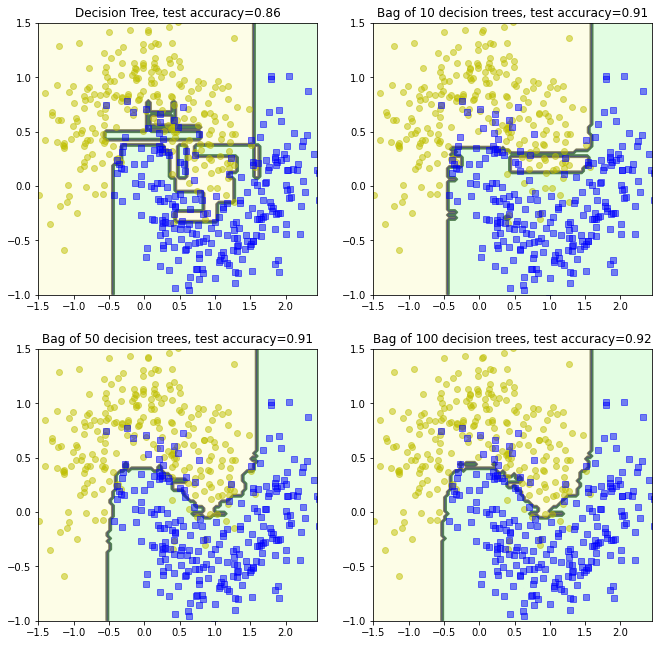

In [4]:
# Baggging decision trees in 2d
# Based on https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb


import numpy as np
import matplotlib.pyplot as plt
import os

try:
    from sklearn.metrics import accuracy_score
except ModuleNotFoundError:
    %pip install -qq scikit-learn
    from sklearn.metrics import accuracy_score


#####################################################################
# TODO: Import BaggingClassifier and meta-estimator                 #
#####################################################################
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
#####################################################################
#                        End of your code.                          #
#####################################################################

from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(["#7d7d58", "#4c4c7f", "#507d50"])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"", fontsize=18)
    plt.ylabel(r"", fontsize=18, rotation=0)


#####################################################################
# TODO: Instantiate DecisionTreeClassifier                          #
#####################################################################
tree_clf = DecisionTreeClassifier(random_state = 42).fit(X_train, y_train)
#####################################################################
#                        End of your code.                          #
#####################################################################

y_pred_tree = tree_clf.predict(X_test)


dtree_acc = accuracy_score(y_test, y_pred_tree)


# plt.figure()
plt.figure(figsize=(11,11)) # modified by me

plt.subplot(221) # modified by me
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree, test accuracy={:0.2f}".format(dtree_acc))
# plt.savefig("figures/dtree_bag_size0.pdf", dpi=300)
# plt.show()

bag_sizes = [10, 50, 100]
for i, bag_size in enumerate(bag_sizes): # modified by me
    bag_clf = BaggingClassifier(
        DecisionTreeClassifier(random_state=42),
        #####################################################################
        # TODO: Specify the number of meta estimators                       #
        #####################################################################
        n_estimators = bag_size
        #####################################################################
        #                        End of your code.                          #
        #####################################################################
        
        ,max_samples=100, bootstrap=True, random_state=42
    )
    bag_clf.fit(X_train, y_train)
    y_pred = bag_clf.predict(X_test)
    bag_acc = accuracy_score(y_test, y_pred)

    # plt.figure()
    plt.subplot(222 + i) # modified by me
    plot_decision_boundary(bag_clf, X, y)
    plt.title("Bag of {} decision trees, test accuracy={:0.2f}".format(bag_size, bag_acc))
    # plt.savefig("figures/dtree_bag_size{}.pdf".format(bag_size), dpi=300)
    # plt.show()

plt.show()

# Random Forests

In random forests (see [RandomForestClassifier]() and [RandomForestRegressor]() classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.

Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size `max_features`. (See the [parameter tuning guidelines]() for more details).

The purpose of these two sources of randomness is to decrease the variance of the forest estimator. Indeed, individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model.

## RandomForestClassifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the `max_samples` parameter if `bootstrap=True` (default), otherwise the whole dataset is used to build each tree.

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

#####################################################################
# TODO: Instantiate RandomForestClassifier                          #
#####################################################################
clf = RandomForestClassifier(max_depth = 2, random_state = 0)
clf.fit(X, y)
#RandomForestClassifier(...)
#####################################################################
#                        End of your code.                          #
#####################################################################

print(clf.predict([[0, 0, 0, 0]]))

[1]


## RandomForestRegressor

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the `max_samples` parameter if `bootstrap=True` (default), otherwise the whole dataset is used to build each tree.

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)

#####################################################################
# TODO: Instantiate RandomForestRegressor                           #
#####################################################################
regr = RandomForestRegressor(max_depth= 2, random_state= 0).fit(X, y)
#RandomForestRegressor(...)
#####################################################################
#                        End of your code.                          #
#####################################################################

print(regr.predict([[0, 0, 0, 0]]))

[-8.32987858]


## Exercise

Elapsed time to compute the importances: 0.026 seconds


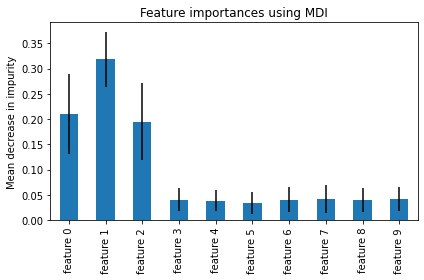

In [8]:
# This example shows the use of a forest of trees to evaluate the importance of features on an artificial classification task. 
# The blue bars are the feature importances of the forest, along with their inter-trees variability represented by the error bars.

# step 1: Data generation and model fitting
# We generate a synthetic dataset with only 3 informative features. 
# We will explicitly not shuffle the dataset to ensure that the informative features will correspond to the three first columns of X. 
# In addition, we will split our dataset into training and testing subsets.
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

#####################################################################
# TODO: Import RandomForestClassifier                          #
#####################################################################
# A random forest classifier will be fitted to compute the feature importances.
from sklearn.ensemble import RandomForestClassifier
#####################################################################
#                        End of your code.                          #
#####################################################################

feature_names = [f"feature {i}" for i in range(X.shape[1])]

#####################################################################
# TODO: Instantiate RandomForestClassifier                          #
#####################################################################
forest = RandomForestClassifier(random_state= 0 )
#####################################################################
#                        End of your code.                          #
#####################################################################

forest.fit(X_train, y_train)

# step 2: Feature importance based on mean decrease in impurity
# Feature importances are provided by the fitted attribute feature_importances_
# and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.
import time
import numpy as np

start_time = time.time()

#####################################################################
# TODO: acquire the importance of features                          #
#####################################################################
importances = forest.feature_importances_
#####################################################################
#                        End of your code.                          #
#####################################################################

std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

# Let’s plot the impurity-based importance.
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Boosting

The module [sklearn.ensemble]() includes the popular boosting algorithm AdaBoost, introduced in 1995 by Freund and Schapire [FS1995].

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying weights $w_1, w_2, …, w_N$ to each of the training samples. Initially, those weights are all set to $w_i = 1/N$, so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence [HTF].

## AdaBoost

The following example shows how to fit an AdaBoost classifier with 100 weak learners:

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

X, y = load_iris(return_X_y=True)

#####################################################################
# TODO: Instantiate AdaBoostClassifier                              #
#####################################################################
clf = AdaBoostClassifier(n_estimators= 100)
#####################################################################
#                        End of your code.                          #
#####################################################################

scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

0.9466666666666665

Explanation of hyparameters:
  - The number of weak learners is controlled by the parameter `n_estimators`. 
  - The `learning_rate` parameter controls the contribution of the weak learners in the final combination. 
  - By default, weak learners are decision stumps. Different weak learners can be specified through the `estimator` parameter. 
  - The main parameters to tune to obtain good results are n_estimators and the complexity of the base estimators (e.g., its depth `max_depth` or minimum required number of samples to consider a split `min_samples_split`).

## Gradient Tree Boosting

[Gradient Tree Boosting]() or Gradient Boosted Decision Trees (GBDT) is a generalization of boosting to arbitrary differentiable loss functions, see the seminal work of [Friedman2001]. GBDT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems in a variety of areas including Web search ranking and ecology.

The module [sklearn.ensemble]() provides methods for both classification and regression via gradient boosted decision trees.

The usage and the parameters of [GradientBoostingClassifier]() and [GradientBoostingRegressor]() are described below. The 2 most important parameters of these estimators are `n_estimators` and `learning_rate`.

### Classification

[GradientBoostingClassifier]() supports both binary and multi-class classification. The following example shows how to fit a gradient boosting classifier with 100 decision stumps as weak learners:

In [10]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

#####################################################################
# TODO: Instantiate GradientBoostingClassifier                      #
#####################################################################
clf = GradientBoostingClassifier(n_estimators= 100, learning_rate= 1.0, max_depth = 1, random_state= 0)
clf.fit(X_train, y_train)
#####################################################################
#                        End of your code.                          #
#####################################################################

clf.score(X_test, y_test)

0.913

Explanation of hyparameters:
  - The number of weak learners (i.e. regression trees) is controlled by the parameter `n_estimators`;
  - The size of each tree can be controlled either by setting the tree depth via `max_depth` or by setting the number of leaf nodes via `max_leaf_nodes`.
  - The `learning_rate` is a hyper-parameter in the range (0.0, 1.0] that controls overfitting via shrinkage .

### Regression

[GradientBoostingRegressor]() supports a number of [different loss functions]() for regression which can be specified via the argument `loss`; the default loss function for regression is squared error (`'squared_error'`).

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

X, y = make_friedman1(n_samples=1200, random_state=0, noise=1.0)
X_train, X_test = X[:200], X[200:]
y_train, y_test = y[:200], y[200:]

#####################################################################
# TODO: Instantiate GradientBoostingRegressor                       #
#####################################################################
est = GradientBoostingRegressor(n_estimators= 100, learning_rate = 0.1, max_depth= 1, random_state = 0, loss = 'squared_error').fit(X_train, y_train)
#####################################################################
#                        End of your code.                          #
#####################################################################

mean_squared_error(y_test, est.predict(X_test))

5.009154859960321

## Exercise

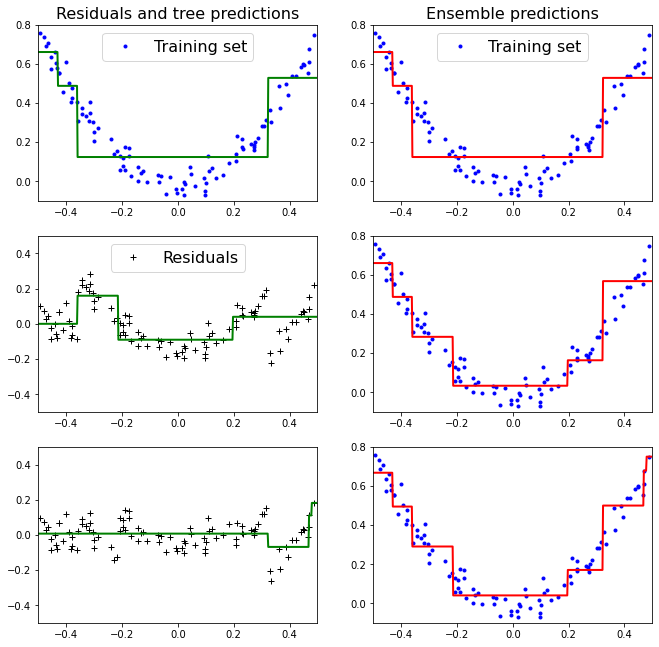

In [13]:
# feature importance using random forests  on ,mnist
# Based on https://github.com/ageron/handson-ml2/blob/master/06_decision_trees.ipynb

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)


try:
    from sklearn.tree import DecisionTreeRegressor
except ModuleNotFoundError:
    %pip install -qq scikit-learn
    from sklearn.tree import DecisionTreeRegressor

#####################################################################
# TODO: Instantiate DecisionTreeRegressor                           #
#####################################################################
# the first weak learner
tree_reg1 = DecisionTreeRegressor(max_depth= 2, random_state= 42)
tree_reg1.fit(X, y)
#####################################################################
#                        End of your code.                          #
#####################################################################


# the second weak learner
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
#####################################################################
# TODO: Intermediate step for boosting.                             #
#####################################################################
# based on the training strategy of gradient boosting
y2 = y - tree_reg1.predict(X)
tree_reg2.fit(X, y2)
#####################################################################
#                        End of your code.                          #
#####################################################################

# the third weak learner
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
#####################################################################
# TODO: Intermediate step for boosting.                             #
#####################################################################
y3 = y2 - tree_reg2.predict(X)
tree_reg3.fit(X, y3)
#####################################################################
#                        End of your code.                          #
#####################################################################


def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)
    
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="", style="g-", data_label="Training set")
plt.ylabel("", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], 
                 label="", data_label="Training set")
plt.ylabel("", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5],
                 label="", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8],
                 label="")
plt.ylabel("", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], 
                 label="", style="g-", data_style="k+")
plt.ylabel("", fontsize=16)
plt.xlabel("", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, 
                 axes=[-0.5, 0.5, -0.1, 0.8], 
                 label="")
plt.xlabel("", fontsize=16)
plt.ylabel("", fontsize=16, rotation=0)

# plt.savefig("figures/boosted_regr_trees.pdf", dpi=300)
plt.show()

# Comparative analysis (Optional)

Logistic Regression Test Error Rate: 7.6%
RF 10 trees, test error 6.3%
RF 50 trees, test error 5.0%
RF 100 trees, test error 4.9%
RF 200 trees, test error 4.8%
RF 300 trees, test error 4.9%
RF 400 trees, test error 4.8%
RF 500 trees, test error 4.8%
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 8.7 MB/s eta 0:00:00
Boosting 10 trees, test error 6.2%
Boosting 50 trees, test error 5.4%
Boosting 100 trees, test error 4.7%
Boosting 200 trees, test error 4.6%
Boosting 300 trees, test error 4.8%
Boosting 400 trees, test error 4.6%
Boosting 500 trees, test error 4.4%
Bagged 10 trees, test error 5.9%
Bagged 50 trees, test error 5.5%
Bagged 100 trees, test error 5.4%
Bagged 200 trees, test error 5.5%
Bagged 300 trees, test error 5.5%
Bagged 400 trees, test error 5.4%


Bagged 500 trees, test error 5.6%


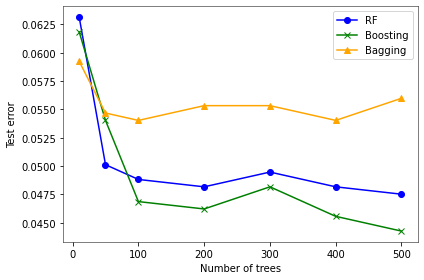

In [14]:
# Performance of tree ensembles. Based on the email spam example from chapter 10 of "Elements of statistical learning". Code is from Andrey Gaskov's site:

# https://github.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks/blob/master/examples/Spam.ipynb


# Commented out IPython magic to ensure Python compatibility.

try:
    import pandas as pd
except ModuleNotFoundError:
    %pip install -qq pandas
    import pandas as pd
from matplotlib import transforms, pyplot as plt
import numpy as np

try:
    from sklearn.metrics import accuracy_score
except ModuleNotFoundError:
    %pip install -qq scikit-learn
    from sklearn.metrics import accuracy_score

# omit numpy warnings (don't do it in real work)
np.seterr(divide="ignore", invalid="ignore")
np.warnings.filterwarnings("ignore")
# %matplotlib inline

# define plots common properties and color constants
plt.rcParams["font.family"] = "Arial"
plt.rcParams["axes.linewidth"] = 0.5
ORANGE, BLUE, PURPLE = "#FF8C00", "#0000FF", "#A020F0"
GRAY1, GRAY4, GRAY7 = "#231F20", "#646369", "#929497"


# we will calculate train and test error rates for all models
def error_rate(y_true, y_pred):
    return 1 - accuracy_score(y_true, y_pred)


"""Get data"""

df = pd.read_csv(
    "https://github.com/empathy87/The-Elements-of-Statistical-Learning-Python-Notebooks/blob/master/data/Spam.txt?raw=True"
)
df.head()

# PAGE 301. We coded spam as 1 and email as zero. A test set of size 1536 was
#           randomly chosen, leaving 3065 observations in the training set.
target = "spam"
columns = [
    "word_freq_make",
    "word_freq_address",
    "word_freq_all",
    "word_freq_3d",
    "word_freq_our",
    "word_freq_over",
    "word_freq_remove",
    "word_freq_internet",
    "word_freq_order",
    "word_freq_mail",
    "word_freq_receive",
    "word_freq_will",
    "word_freq_people",
    "word_freq_report",
    "word_freq_addresses",
    "word_freq_free",
    "word_freq_business",
    "word_freq_email",
    "word_freq_you",
    "word_freq_credit",
    "word_freq_your",
    "word_freq_font",
    "word_freq_000",
    "word_freq_money",
    "word_freq_hp",
    "word_freq_hpl",
    "word_freq_george",
    "word_freq_650",
    "word_freq_lab",
    "word_freq_labs",
    "word_freq_telnet",
    "word_freq_857",
    "word_freq_data",
    "word_freq_415",
    "word_freq_85",
    "word_freq_technology",
    "word_freq_1999",
    "word_freq_parts",
    "word_freq_pm",
    "word_freq_direct",
    "word_freq_cs",
    "word_freq_meeting",
    "word_freq_original",
    "word_freq_project",
    "word_freq_re",
    "word_freq_edu",
    "word_freq_table",
    "word_freq_conference",
    "char_freq_;",
    "char_freq_(",
    "char_freq_[",
    "char_freq_!",
    "char_freq_$",
    "char_freq_#",
    "capital_run_length_average",
    "capital_run_length_longest",
    "capital_run_length_total",
]
# let's give columns more compact names
features = [
    "make",
    "address",
    "all",
    "3d",
    "our",
    "over",
    "remove",
    "internet",
    "order",
    "mail",
    "receive",
    "will",
    "people",
    "report",
    "addresses",
    "free",
    "business",
    "email",
    "you",
    "credit",
    "your",
    "font",
    "000",
    "money",
    "hp",
    "hpl",
    "george",
    "650",
    "lab",
    "labs",
    "telnet",
    "857",
    "data",
    "415",
    "85",
    "technology",
    "1999",
    "parts",
    "pm",
    "direct",
    "cs",
    "meeting",
    "original",
    "project",
    "re",
    "edu",
    "table",
    "conference",
    "ch_;",
    "ch(",
    "ch[",
    "ch!",
    "ch$",
    "ch#",
    "CAPAVE",
    "CAPMAX",
    "CAPTOT",
]

X, y = df[columns].values, df[target].values

# split by test column value
is_test = df.test.values
X_train, X_test = X[is_test == 0], X[is_test == 1]
y_train, y_test = y[is_test == 0], y[is_test == 1]

""" Logistic regression

As a sanity check, we try to match p301  test error rate of 7.6%.

"""

try:
    import statsmodels.api as sm
except ModuleNotFoundError:
    %pip install -qq statsmodels
    import statsmodels.api as sm
from sklearn.metrics import accuracy_score

lr_clf = sm.Logit(y_train, sm.add_constant(X_train)).fit(disp=False)
# 0.5 is a threshold
y_test_hat = (lr_clf.predict(sm.add_constant(X_test)) > 0.5).astype(int)
lr_error_rate = error_rate(y_test, y_test_hat)
print(f"Logistic Regression Test Error Rate: {lr_error_rate*100:.1f}%")


# PAGE 590. A random forest classifier achieves 4.88% misclassification error
#           on the spam test data, which compares well with all other methods,
#           and is not significantly worse than gradient boosting at 4.5%.
ntrees_list = [10, 50, 100, 200, 300, 400, 500]

#####################################################################
# TODO: Import RandomForestClassifier                               #
#####################################################################
from sklearn.ensemble import RandomForestClassifier
#####################################################################
#                        End of your code.                          #
#####################################################################

rf_errors = []
for ntrees in ntrees_list:
    #####################################################################
    # TODO: Instantiate RandomForestClassifier                          #
    #####################################################################
    rf_clf = RandomForestClassifier(n_estimators= ntrees, random_state= 10).fit(X_train, y_train)
    #####################################################################
    #                        End of your code.                          #
    #####################################################################

    y_test_hat = rf_clf.predict(X_test)
    rf_error_rate = error_rate(y_test, y_test_hat)
    rf_errors.append(rf_error_rate)
    print(f"RF {ntrees} trees, test error {rf_error_rate*100:.1f}%")

try:
    from catboost import CatBoostClassifier, Pool, cv
except ModuleNotFoundError:
    %pip install -qq catboost
    from catboost import CatBoostClassifier, Pool, cv

boost_errors = []
for ntrees in ntrees_list:
    #####################################################################
    # TODO: Instantiate CatBoostClassifier                              #
    #####################################################################
    boost_clf = CatBoostClassifier(iterations = ntrees, random_state = 10, learning_rate = 0.2, verbose = False).fit(X_train, y_train)
    #####################################################################
    #                        End of your code.                          #
    #####################################################################

    y_test_hat = boost_clf.predict(X_test)
    boost_error_rate = error_rate(y_test, y_test_hat)
    boost_errors.append(boost_error_rate)
    print(f"Boosting {ntrees} trees, test error {boost_error_rate*100:.1f}%")

from sklearn.ensemble import BaggingClassifier

bag_errors = []
for ntrees in ntrees_list:
    #####################################################################
    # TODO: Instantiate BaggingClassifier                               #
    #####################################################################
    bag_clf = BaggingClassifier(n_estimators= ntrees, random_state = 10, bootstrap= True).fit(X_train, y_train)
    ######################################################################
    #                        End of your code.                          #
    #####################################################################

    y_test_hat = bag_clf.predict(X_test)
    bag_error_rate = error_rate(y_test, y_test_hat)
    bag_errors.append(bag_error_rate)
    print(f"Bagged {ntrees} trees, test error {bag_error_rate*100:.1f}%")


plt.figure()
plt.plot(ntrees_list, rf_errors, "o-", color="blue", label="RF")
plt.plot(ntrees_list, boost_errors, "x-", color="green", label="Boosting")
plt.plot(ntrees_list, bag_errors, "^-", color="orange", label="Bagging")
plt.legend()
plt.xlabel("Number of trees")
plt.ylabel("Test error")
plt.tight_layout()
# plt.savefig("figures/spam_tree_ensemble_compare.pdf", dpi=300)
plt.show()

# Recommended Materials



## Gradient Boosting regression

[A tutorial on gradient boosting regression](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py) can help you roughly understand a relatively complete process of ensemble learning.

## Categorical Feature Support in Gradient Boosting

This [tutorial](https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_categorical.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-categorical-py) compares the training times and prediction performances of HistGradientBoostingRegressor with different encoding strategies for categorical features.

## Histogram-Based Gradient Boosting

Scikit-learn 0.21 introduced two new implementations of gradient boosting trees, namely [HistGradientBoostingClassifier]() and [HistGradientBoostingRegressor](), inspired by [LightGBM]() (See [LightGBM]).

These histogram-based estimators can be __orders of magnitude faster__ than [GradientBoostingClassifier]() and [GradientBoostingRegressor]() when the number of samples is larger than tens of thousands of samples.

They also have built-in support for missing values, which avoids the need for an imputer.

The API of these estimators is slightly different, and some of the features from [GradientBoostingClassifier]() and [GradientBoostingRegressor]() are not yet supported, for instance some loss functions.

# References

1. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Duchesnay, E. (2011). Scikit-learn: Machine learning in Python. the Journal of machine Learning research, 12, 2825-2830.
2. Murphy, K. P. (2022). Probabilistic machine learning: an introduction. MIT press.